In [1]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
import math
import matplotlib.patches as patches

# ABM calibration with loss functions and optimisation algorithms

This tutorial is inspired by the paper Automated multi-objective calibration of biological agent-based simulations, which uses the kolmogorov-smirnov test in conjunction with optimisation algorithms to calibrate agent-based models.

In [2]:
# Make style adjustments
sns.set(style="ticks", context="talk", font_scale=2)
plt.style.use("dark_background")
plt.figure(figsize=(500,500))
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
plt.rcParams.update({'font.size': 20})

<Figure size 36000x36000 with 0 Axes>

In [3]:
# Parameters for demo
demo_min = 0
demo_max = 20

# Distribution 1
first_distribution_mean = 10
first_distribution_std = 3
first_distribution_number_samples = 2000

# Distribution 2
second_distribution_mean = 13
second_distribution_std = 4
second_distribution_number_samples = 2000

In [4]:
# Generate first distribution
first_normal_random_list = []

while len(first_normal_random_list) < first_distribution_number_samples:
    random_number = int(np.random.normal(loc=first_distribution_mean, 
                                         scale=first_distribution_std))
    
    if demo_min <= random_number <= demo_max:
        first_normal_random_list.append(random_number)

In [5]:
# Generate second distribution
second_normal_random_list = []

while len(second_normal_random_list) < second_distribution_number_samples:
    random_number = int(np.random.normal(loc=second_distribution_mean, 
                                        scale=second_distribution_std))
# Uncomment the lines below to generate a gamma instead of normal distributi
#     random_number = int(np.random.gamma(second_distribution_mean, 
#                                          second_distribution_std))
    
    if demo_min <= random_number <= demo_max:
        second_normal_random_list.append(random_number)

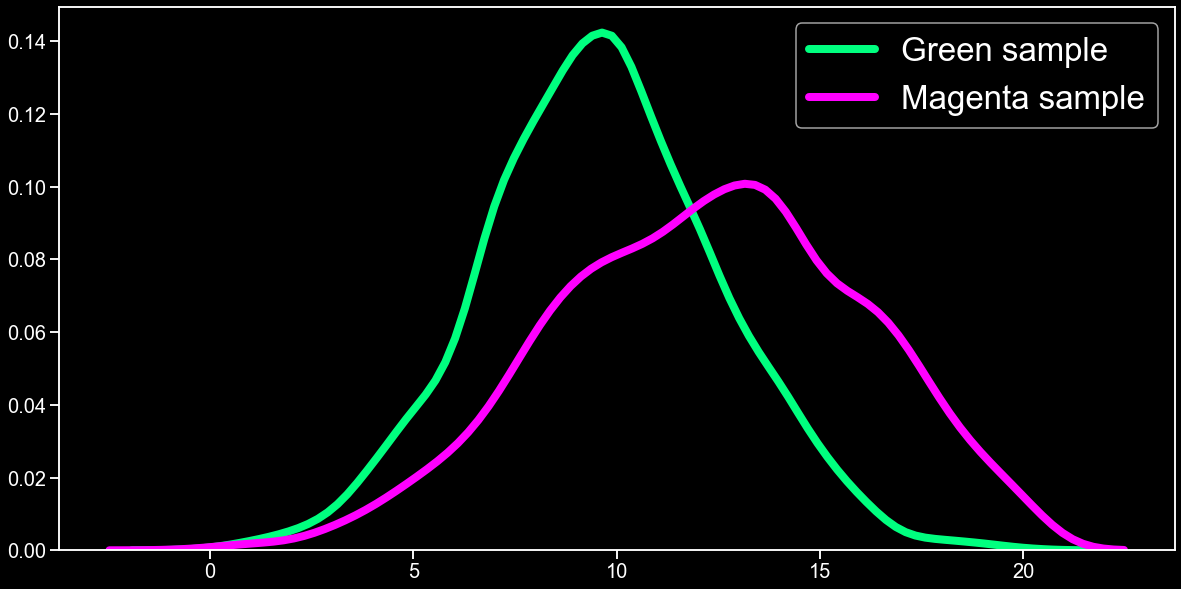

In [6]:
ax = plt.subplots(figsize=(20, 10))
ax = sns.kdeplot(first_normal_random_list, 
            color='SpringGreen', 
            shade=False, 
            label='Green sample',
            linewidth=8)
ax = sns.kdeplot(second_normal_random_list, 
            color='magenta', 
            shade=False, 
            label='Magenta sample',
            linewidth=8)

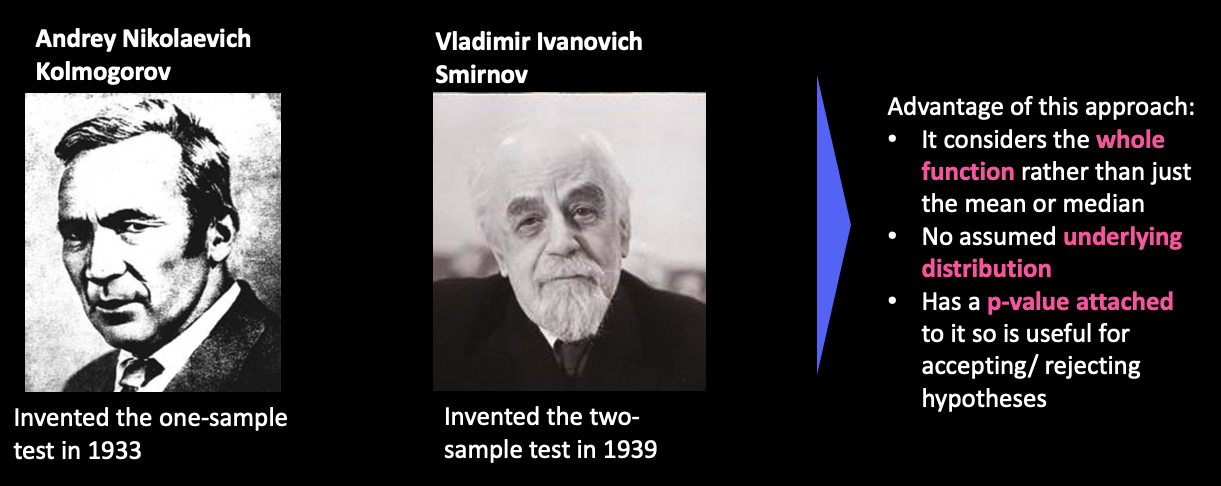

In [8]:
# Compute KS using built in library
computed_ks = stats.ks_2samp(first_normal_random_list, second_normal_random_list)
print(computed_ks)

KstestResult(statistic=0.3535, pvalue=2.5550126072807038e-111)


The ks_2samp function returns a statistic for the maximum discrepancy between the two distributions. It also returns a p-value for rejecting the null hypothesis that the two samples are drawn from the same distribution. A high p-value means we cannot confidently say that the two distributions are different. A low p-value indicates that the samples are drawn from different distributions.

In [9]:
# Generate bins for the data
bins = np.linspace(demo_min, demo_max, demo_max-demo_min+1)
print(bins)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20.]


In [10]:
# Bin the data
series_1_binned = np.histogram(first_normal_random_list, bins=bins)
series_2_binned = np.histogram(second_normal_random_list, bins=bins)
print("Frequencies: "+ str(series_1_binned[0]))
print("Bins: " + str(series_1_binned[1]))

Frequencies: [  5   4  11  34  57 110 146 190 238 233 267 236 190 121  68  45  26  11
   6   2]
Bins: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20.]


Text(0, 0.5, 'Frequency')

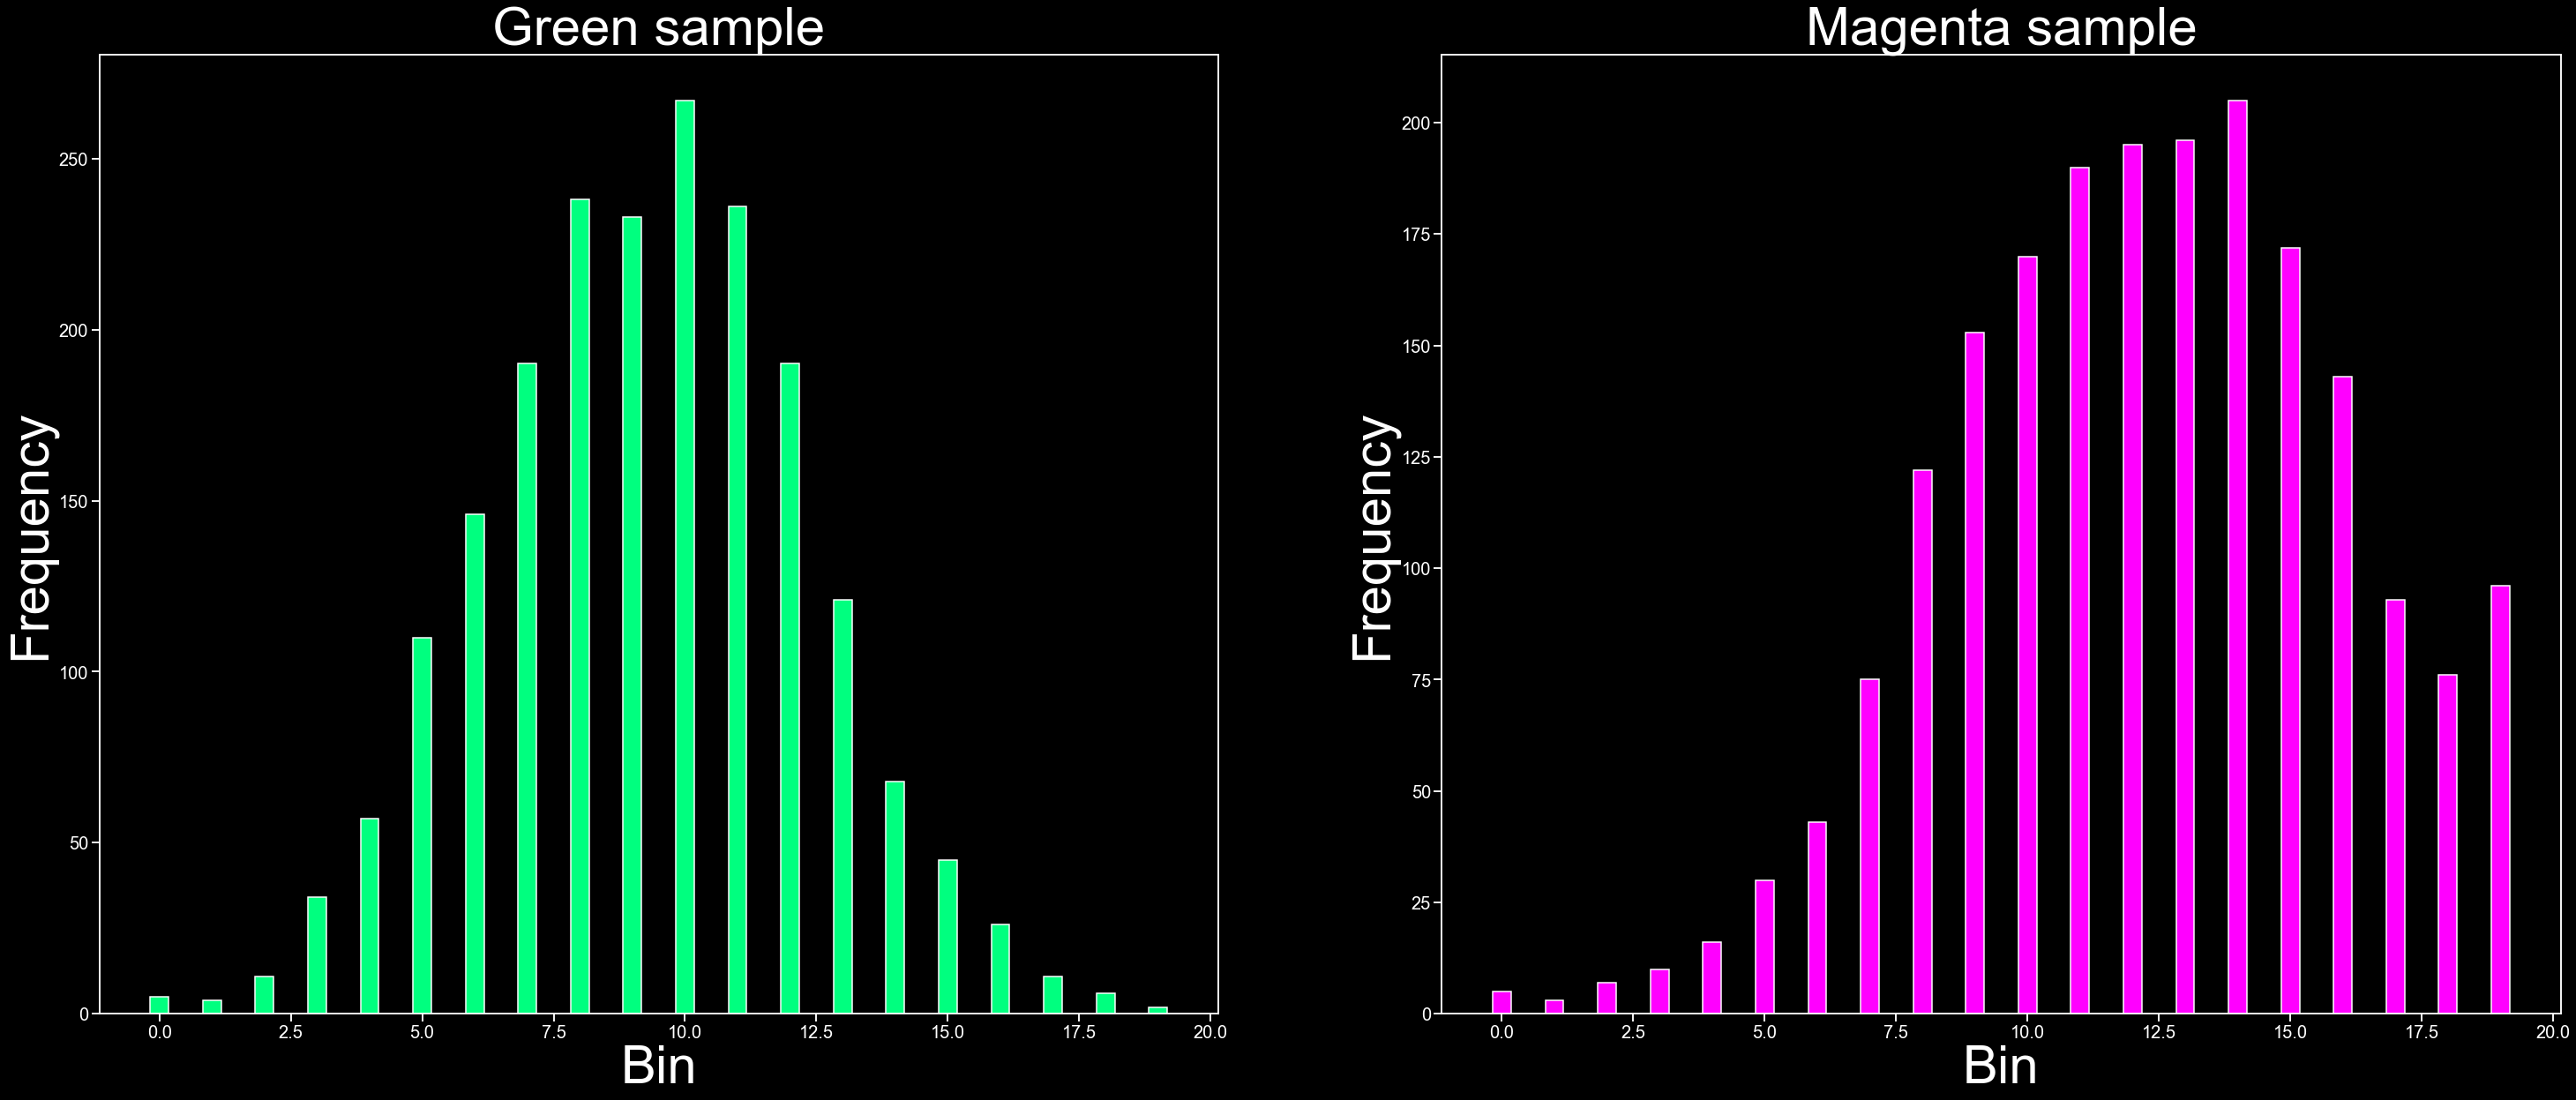

In [11]:
# Visualise binned data
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(50, 20))
ax1.bar(series_1_binned[1][:-1], 
        series_1_binned[0], 
        width=0.35, 
        color='SpringGreen')
ax2.bar(series_2_binned[1][:-1], 
        series_2_binned[0], 
        width=0.35, 
        color='Magenta')

ax1.set_title('Green sample',fontsize=60)
ax1.set_xlabel('Bin',fontsize=60)
ax1.set_ylabel('Frequency',fontsize=60)
ax2.set_title('Magenta sample',fontsize=60)
ax2.set_xlabel('Bin',fontsize=60)
ax2.set_ylabel('Frequency',fontsize=60)


In [12]:
# Calculate the cumulative frequencies of the distributions
series_1_cumulative_frequency = series_1_binned[0].cumsum()
series_2_cumulative_frequency = series_2_binned[0].cumsum()
print(series_1_cumulative_frequency)

[   5    9   20   54  111  221  367  557  795 1028 1295 1531 1721 1842
 1910 1955 1981 1992 1998 2000]


Text(0, 0.5, 'Frequency')

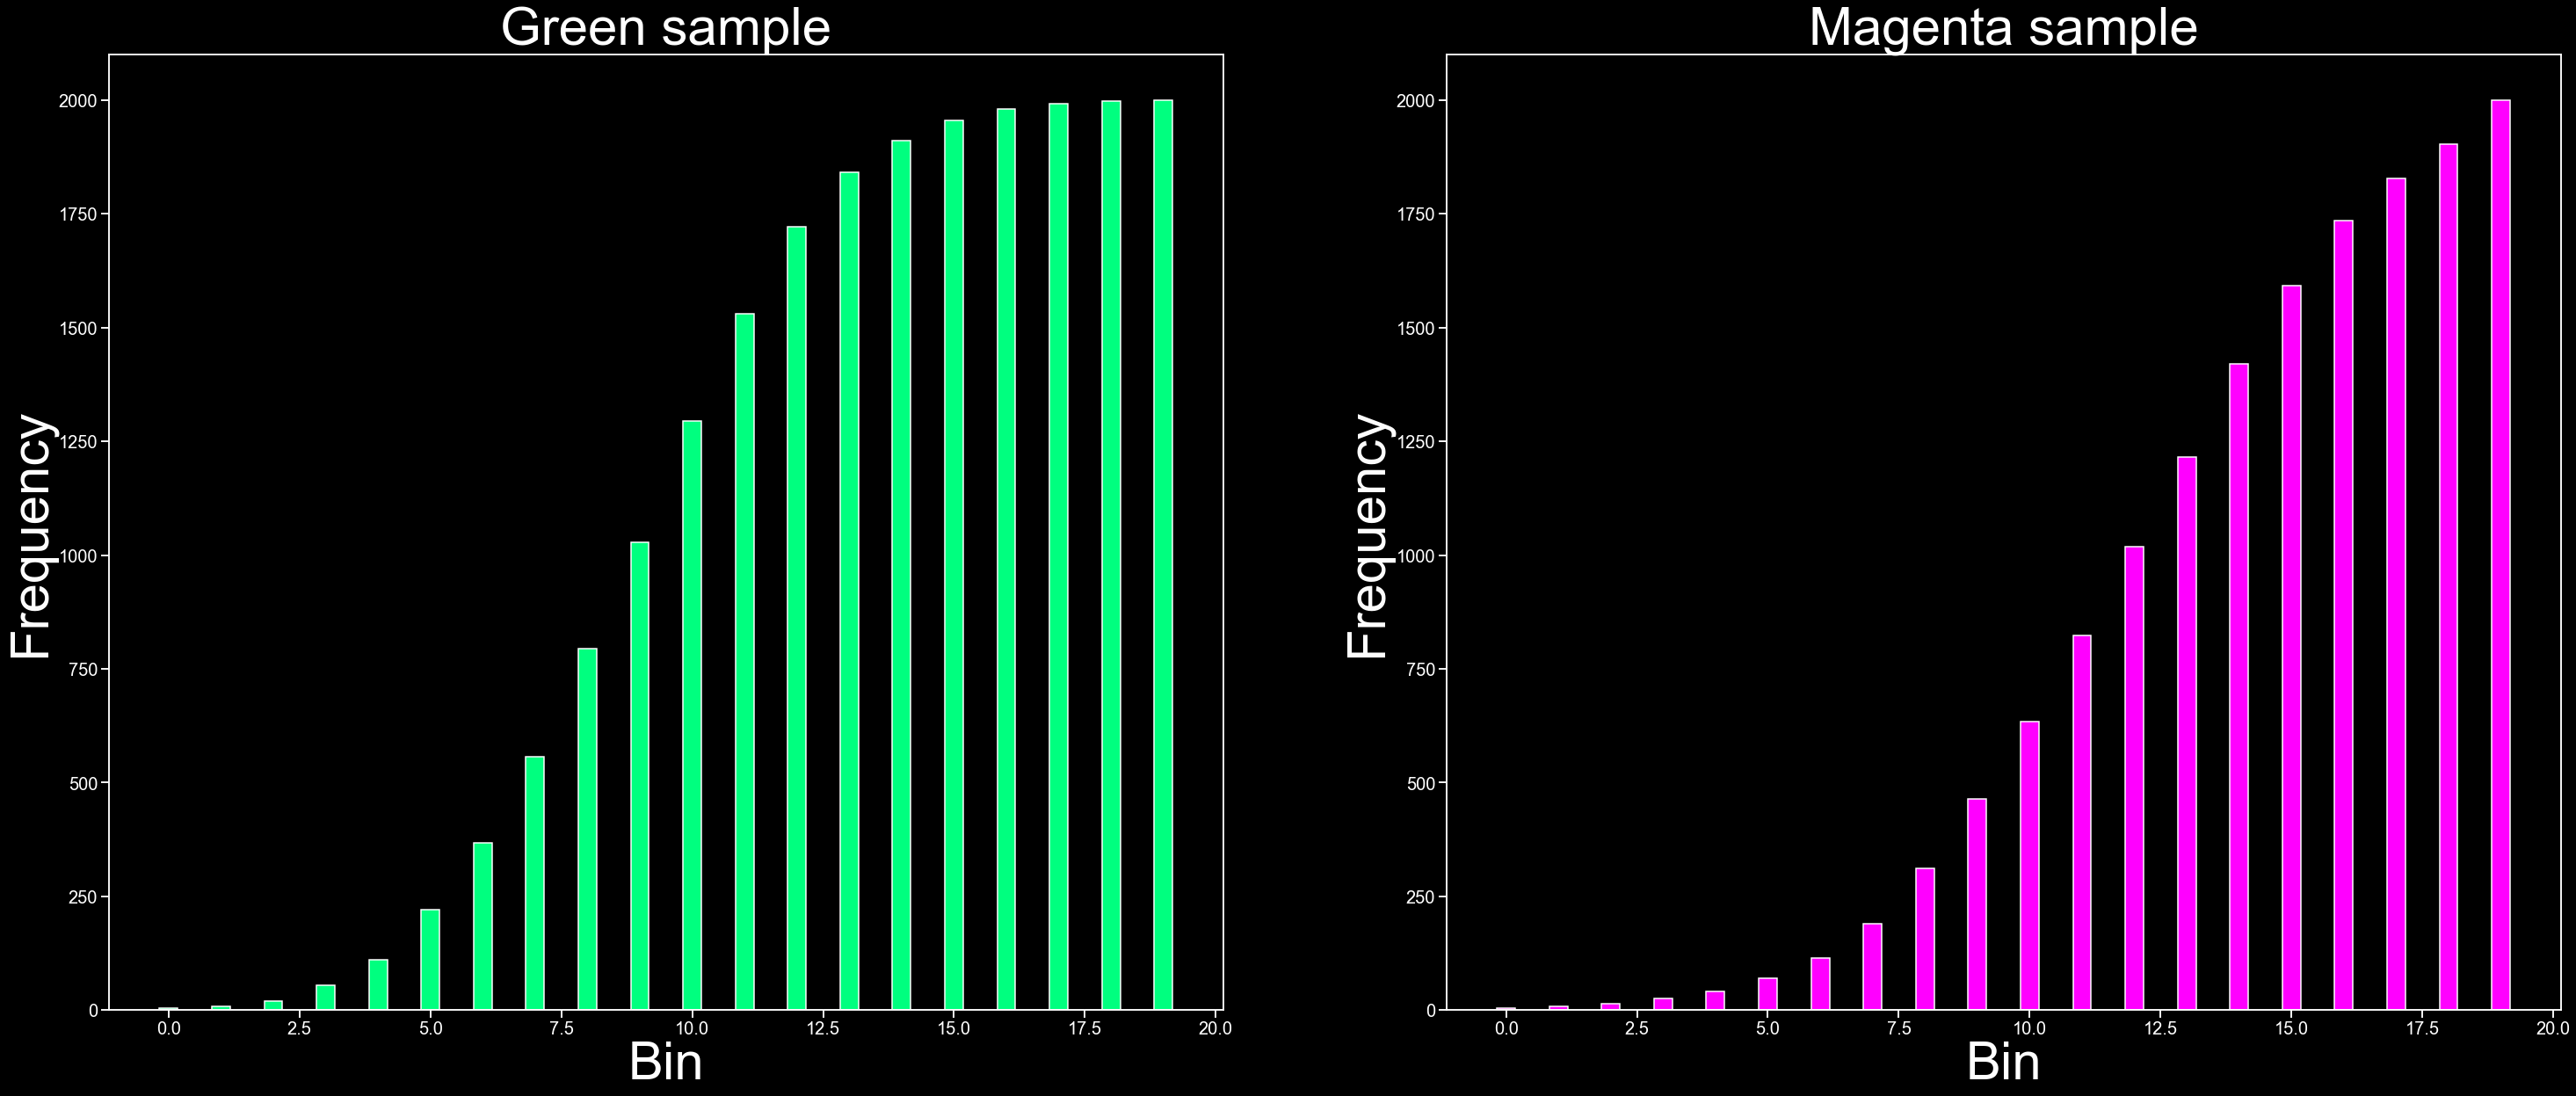

In [13]:
# Visualise cumulative frequency data
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(50, 20))
ax1.bar(series_1_binned[1][:-1], 
        series_1_cumulative_frequency, 
        width=0.35, 
        color='SpringGreen')
ax2.bar(series_1_binned[1][:-1], 
        series_2_cumulative_frequency, 
        width=0.35, 
        color='Magenta')

ax1.set_title('Green sample',fontsize=60)
ax1.set_xlabel('Bin',fontsize=60)
ax1.set_ylabel('Frequency',fontsize=60)
ax2.set_title('Magenta sample',fontsize=60)
ax2.set_xlabel('Bin',fontsize=60)
ax2.set_ylabel('Frequency',fontsize=60)

In [14]:
# Calculate the cumulative frequency proportions of the distributions (empirical distribution function -  edf)
series_1_edf = series_1_binned[0].cumsum()/series_1_binned[0].sum()
series_2_edf = series_2_binned[0].cumsum()/series_2_binned[0].sum()
print(series_1_edf)

[0.0025 0.0045 0.01   0.027  0.0555 0.1105 0.1835 0.2785 0.3975 0.514
 0.6475 0.7655 0.8605 0.921  0.955  0.9775 0.9905 0.996  0.999  1.    ]


Text(0, 0.5, 'Frequency')

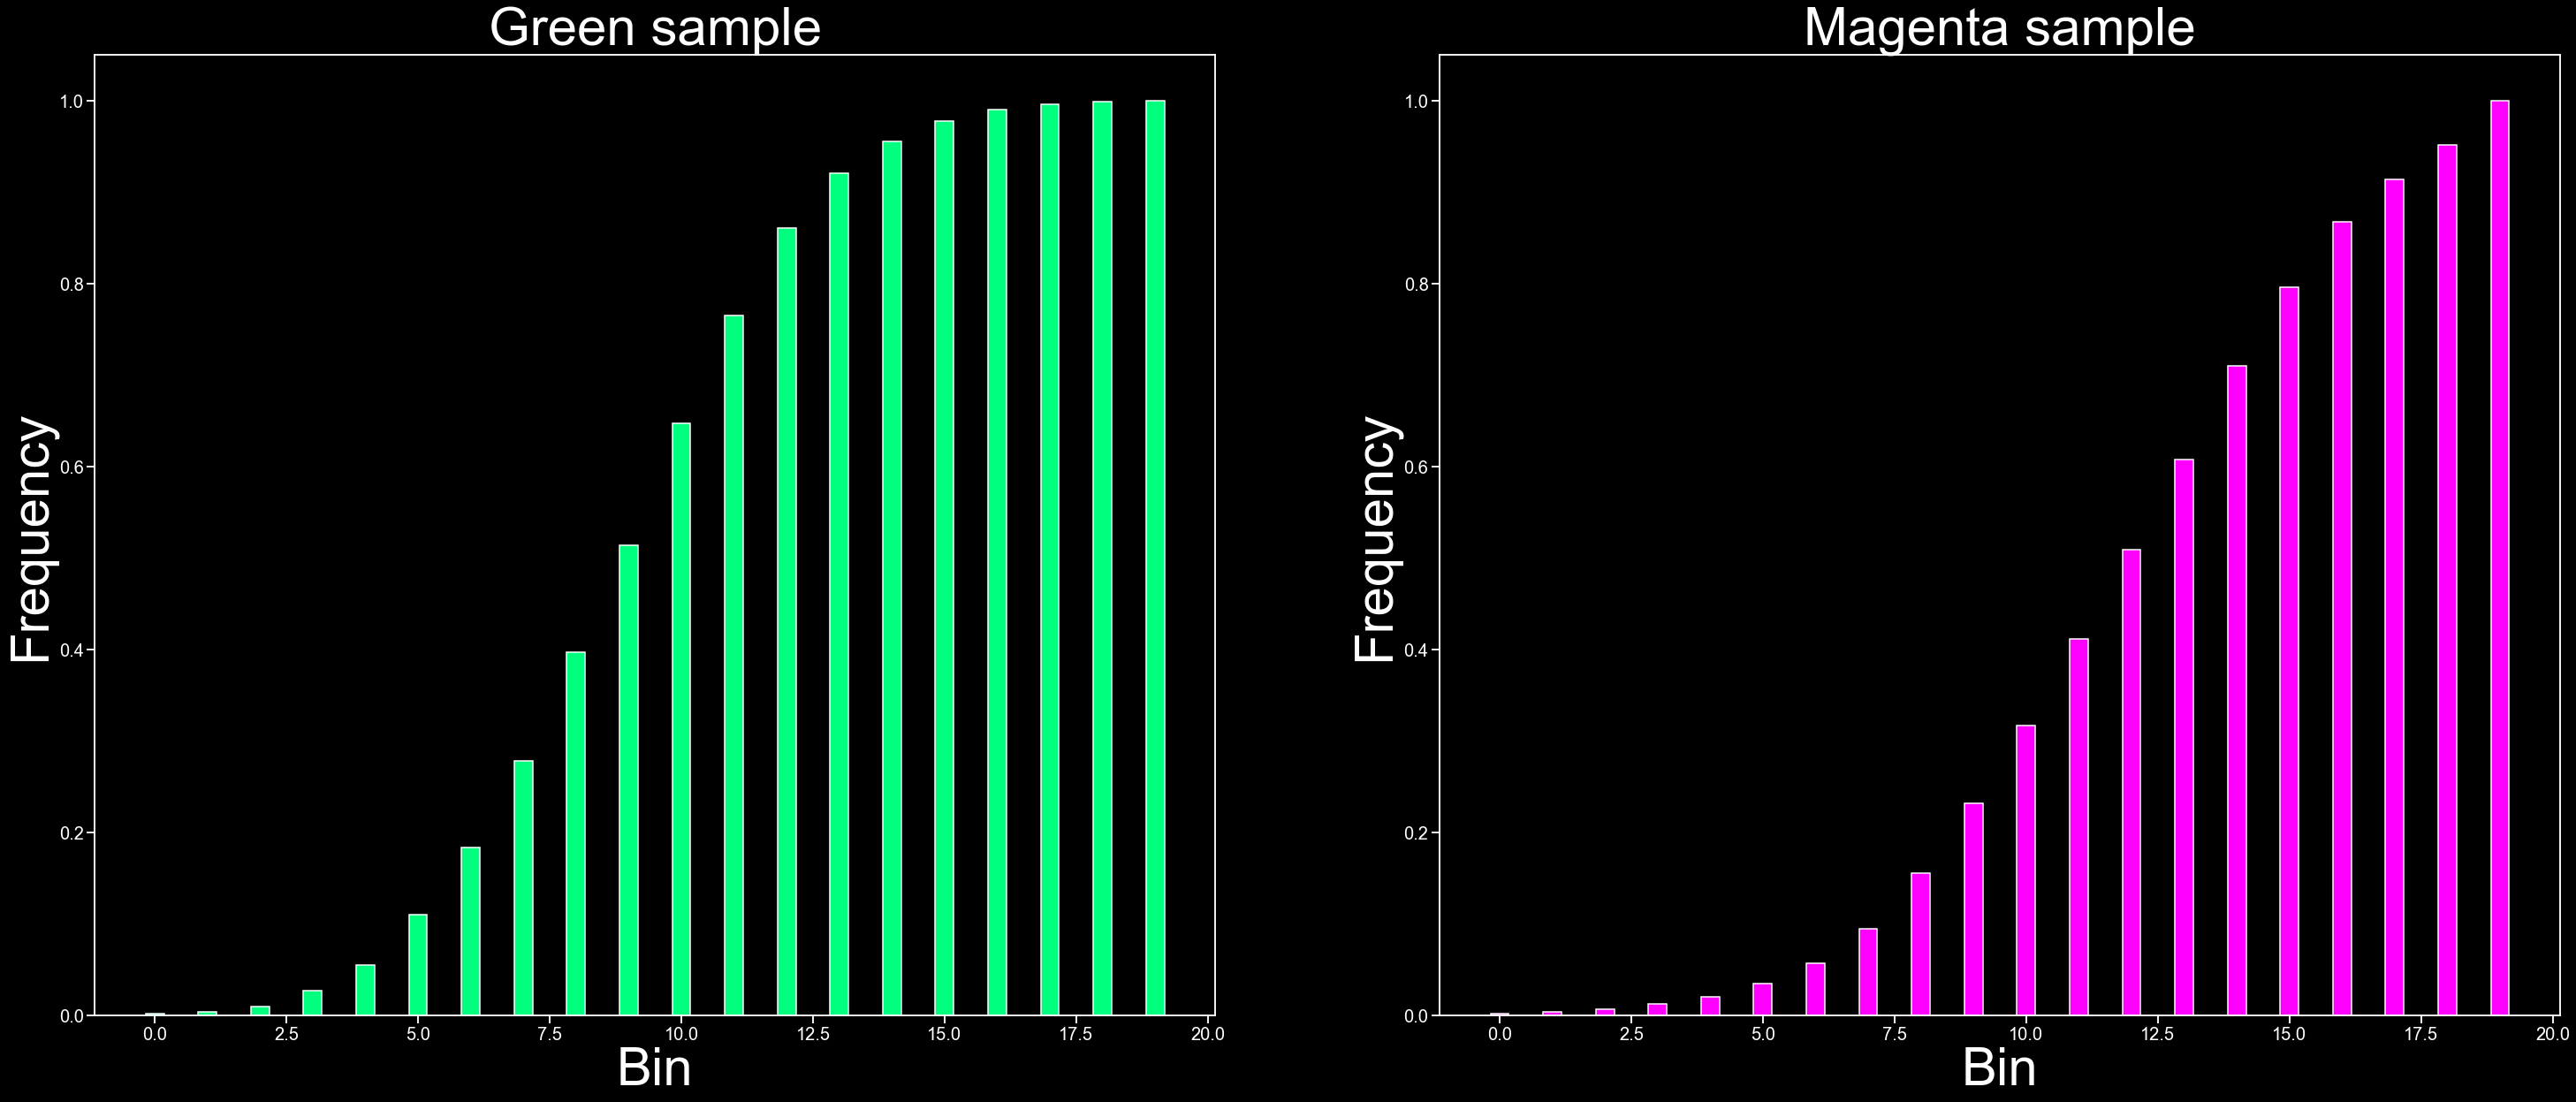

In [15]:
# Visualise cumulative frequency data
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(50, 20))
ax1.bar(series_1_binned[1][:-1], 
        series_1_edf, 
        width=0.35, 
        color='SpringGreen')
ax2.bar(series_1_binned[1][:-1], 
        series_2_edf, 
        width=0.35, 
        color='Magenta')

ax1.set_title('Green sample',fontsize=60)
ax1.set_xlabel('Bin',fontsize=60)
ax1.set_ylabel('Frequency',fontsize=60)
ax2.set_title('Magenta sample',fontsize=60)
ax2.set_xlabel('Bin',fontsize=60)
ax2.set_ylabel('Frequency',fontsize=60)

In [16]:
print("Edf first distribution: " + str(series_1_edf))
print("Edf second distribution: " + str(series_2_edf))
print()
print("Difference between arrays" + str(abs(series_1_edf-series_2_edf)))

Edf first distribution: [0.0025 0.0045 0.01   0.027  0.0555 0.1105 0.1835 0.2785 0.3975 0.514
 0.6475 0.7655 0.8605 0.921  0.955  0.9775 0.9905 0.996  0.999  1.    ]
Edf second distribution: [0.0025 0.004  0.0075 0.0125 0.0205 0.0355 0.057  0.0945 0.1555 0.232
 0.317  0.412  0.5095 0.6075 0.71   0.796  0.8675 0.914  0.952  1.    ]

Difference between arrays[0.     0.0005 0.0025 0.0145 0.035  0.075  0.1265 0.184  0.242  0.282
 0.3305 0.3535 0.351  0.3135 0.245  0.1815 0.123  0.082  0.047  0.    ]


In [17]:
# Compute the maximum distance between distributions
dmax = max(abs(series_1_edf-series_2_edf))
print(dmax)

0.3535


In [18]:
# Confirm that dmax is equal to the test statistic outputted by the ks_2samp function
computed_ks = stats.ks_2samp(first_normal_random_list, second_normal_random_list)
print(computed_ks)

KstestResult(statistic=0.3535, pvalue=2.5550126072807038e-111)




So we understand how to get to the test statistic, but how does this relate to the p-value? The p value corresponds to a threshold distance, above which it is unlikely that the two samples are drawn from the same distribution. To calculate this threshold distance we first look up the constant corresponding to the confidence level we are testing.

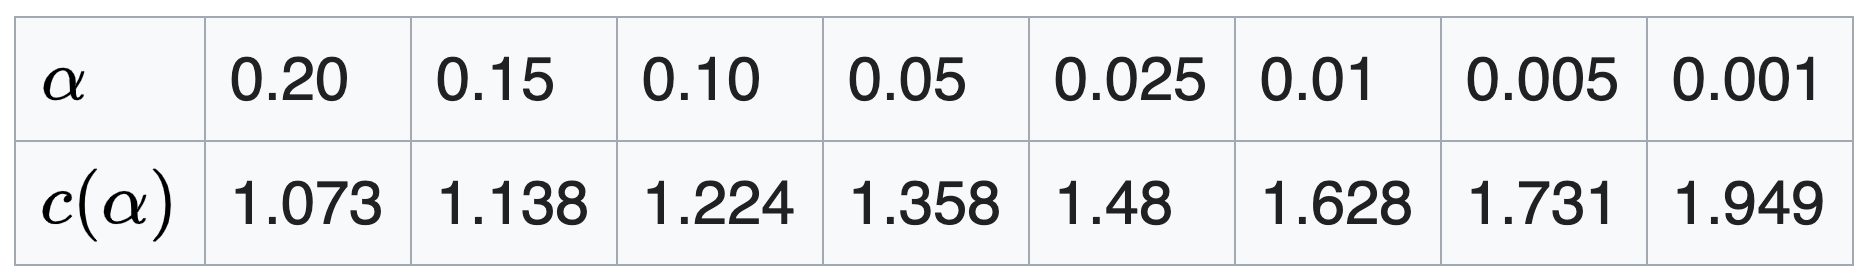

In [19]:
# It's a norm to use 0.05, so we'll use that as an example.
alpha = 1.358

Next we plug this into the threshold formula which takes into account how many observations there are in each sample (represented by 'n' and 'm').

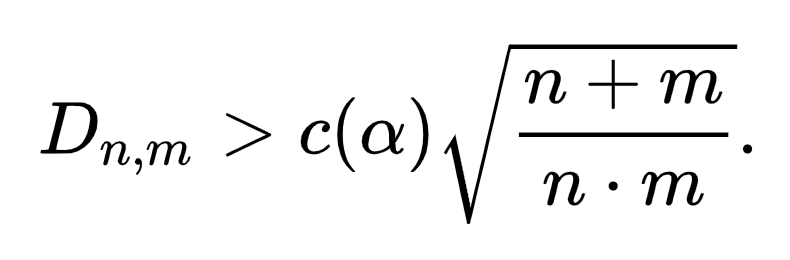

In [20]:
threshold_distance = alpha * math.sqrt((first_distribution_number_samples+second_distribution_number_samples)/
                                       (first_distribution_number_samples*second_distribution_number_samples))
print("Threshold distance is: " + str(threshold_distance))
print("Distance in our distribution is: " + str(dmax))

Threshold distance is: 0.04294373062508659
Distance in our distribution is: 0.3535


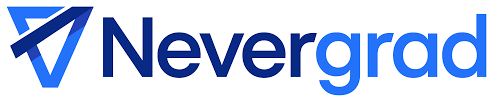

In [21]:
import nevergrad as ng

In [22]:
# Define a loss function
def function(x):
    return (x - .5)**2

In [23]:
# Do a grid search on the loss function
grid_search = np.linspace(0,1,1000)

loss_list = []
for x_value in grid_search:
    loss_list.append(function(x_value))

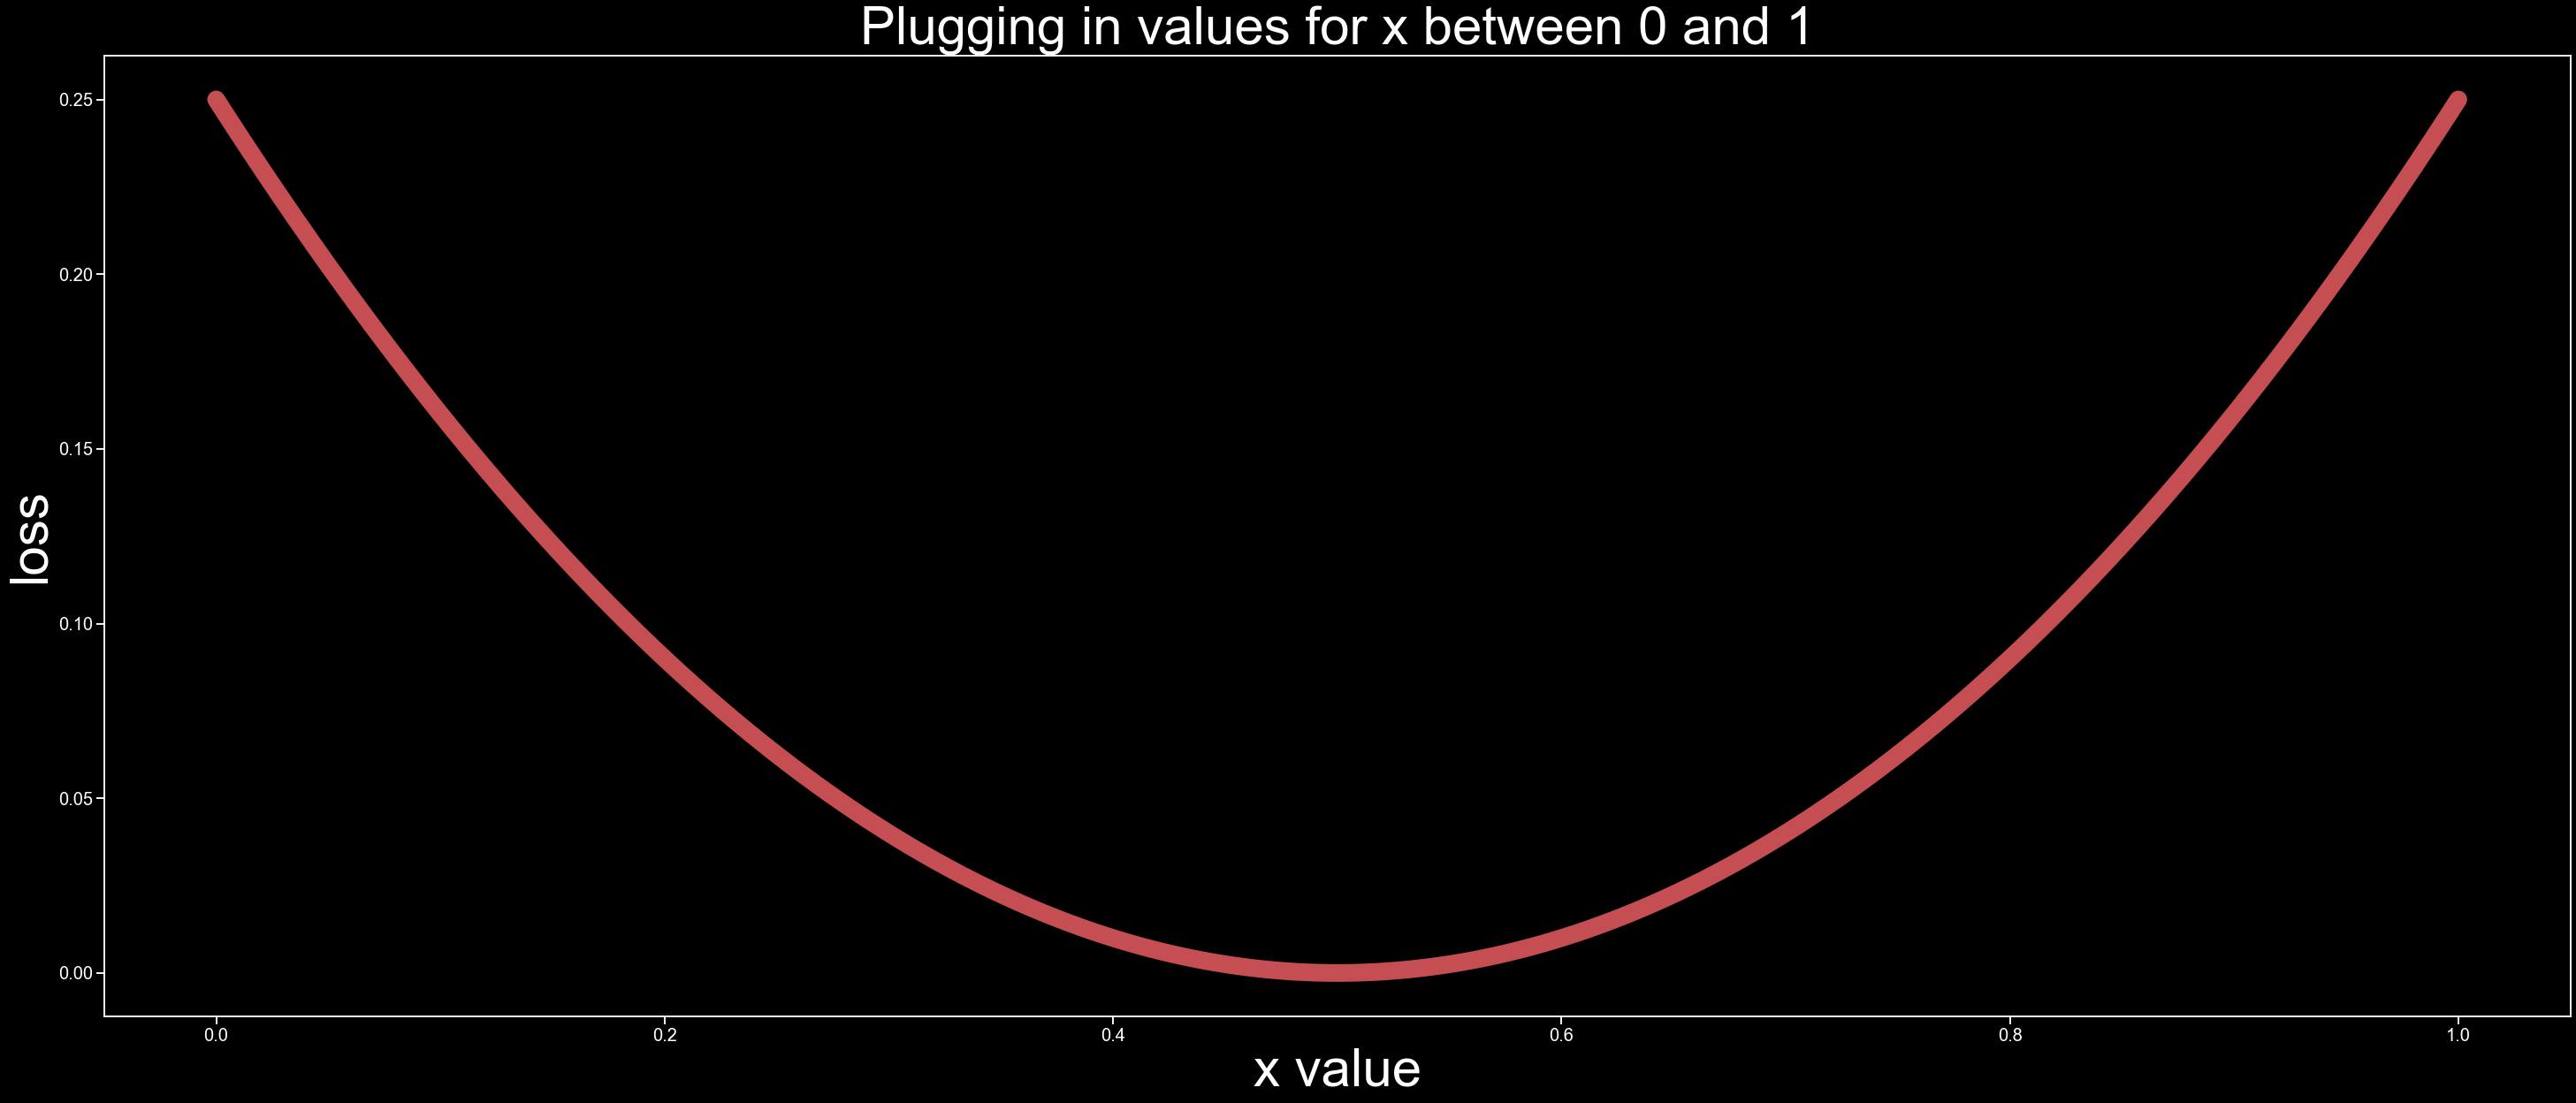

In [24]:
fig, (ax1) = plt.subplots(1,1, figsize=(50, 20))

ax1.set_title('Plugging in values for x between 0 and 1',fontsize=60)
ax1.set_xlabel('x value',fontsize=60)
ax1.set_ylabel('loss',fontsize=60)
    
ax1 = plt.plot(grid_search,loss_list, lw=20, color='r')


In [25]:
# Optimization on x as an array of shape (1,)
optimizer = ng.optimizers.OnePlusOne(parametrization=1, 
                                     budget=100)
recommendation = optimizer.minimize(function)  # best value
print(recommendation.value[0])

0.4999838938125937


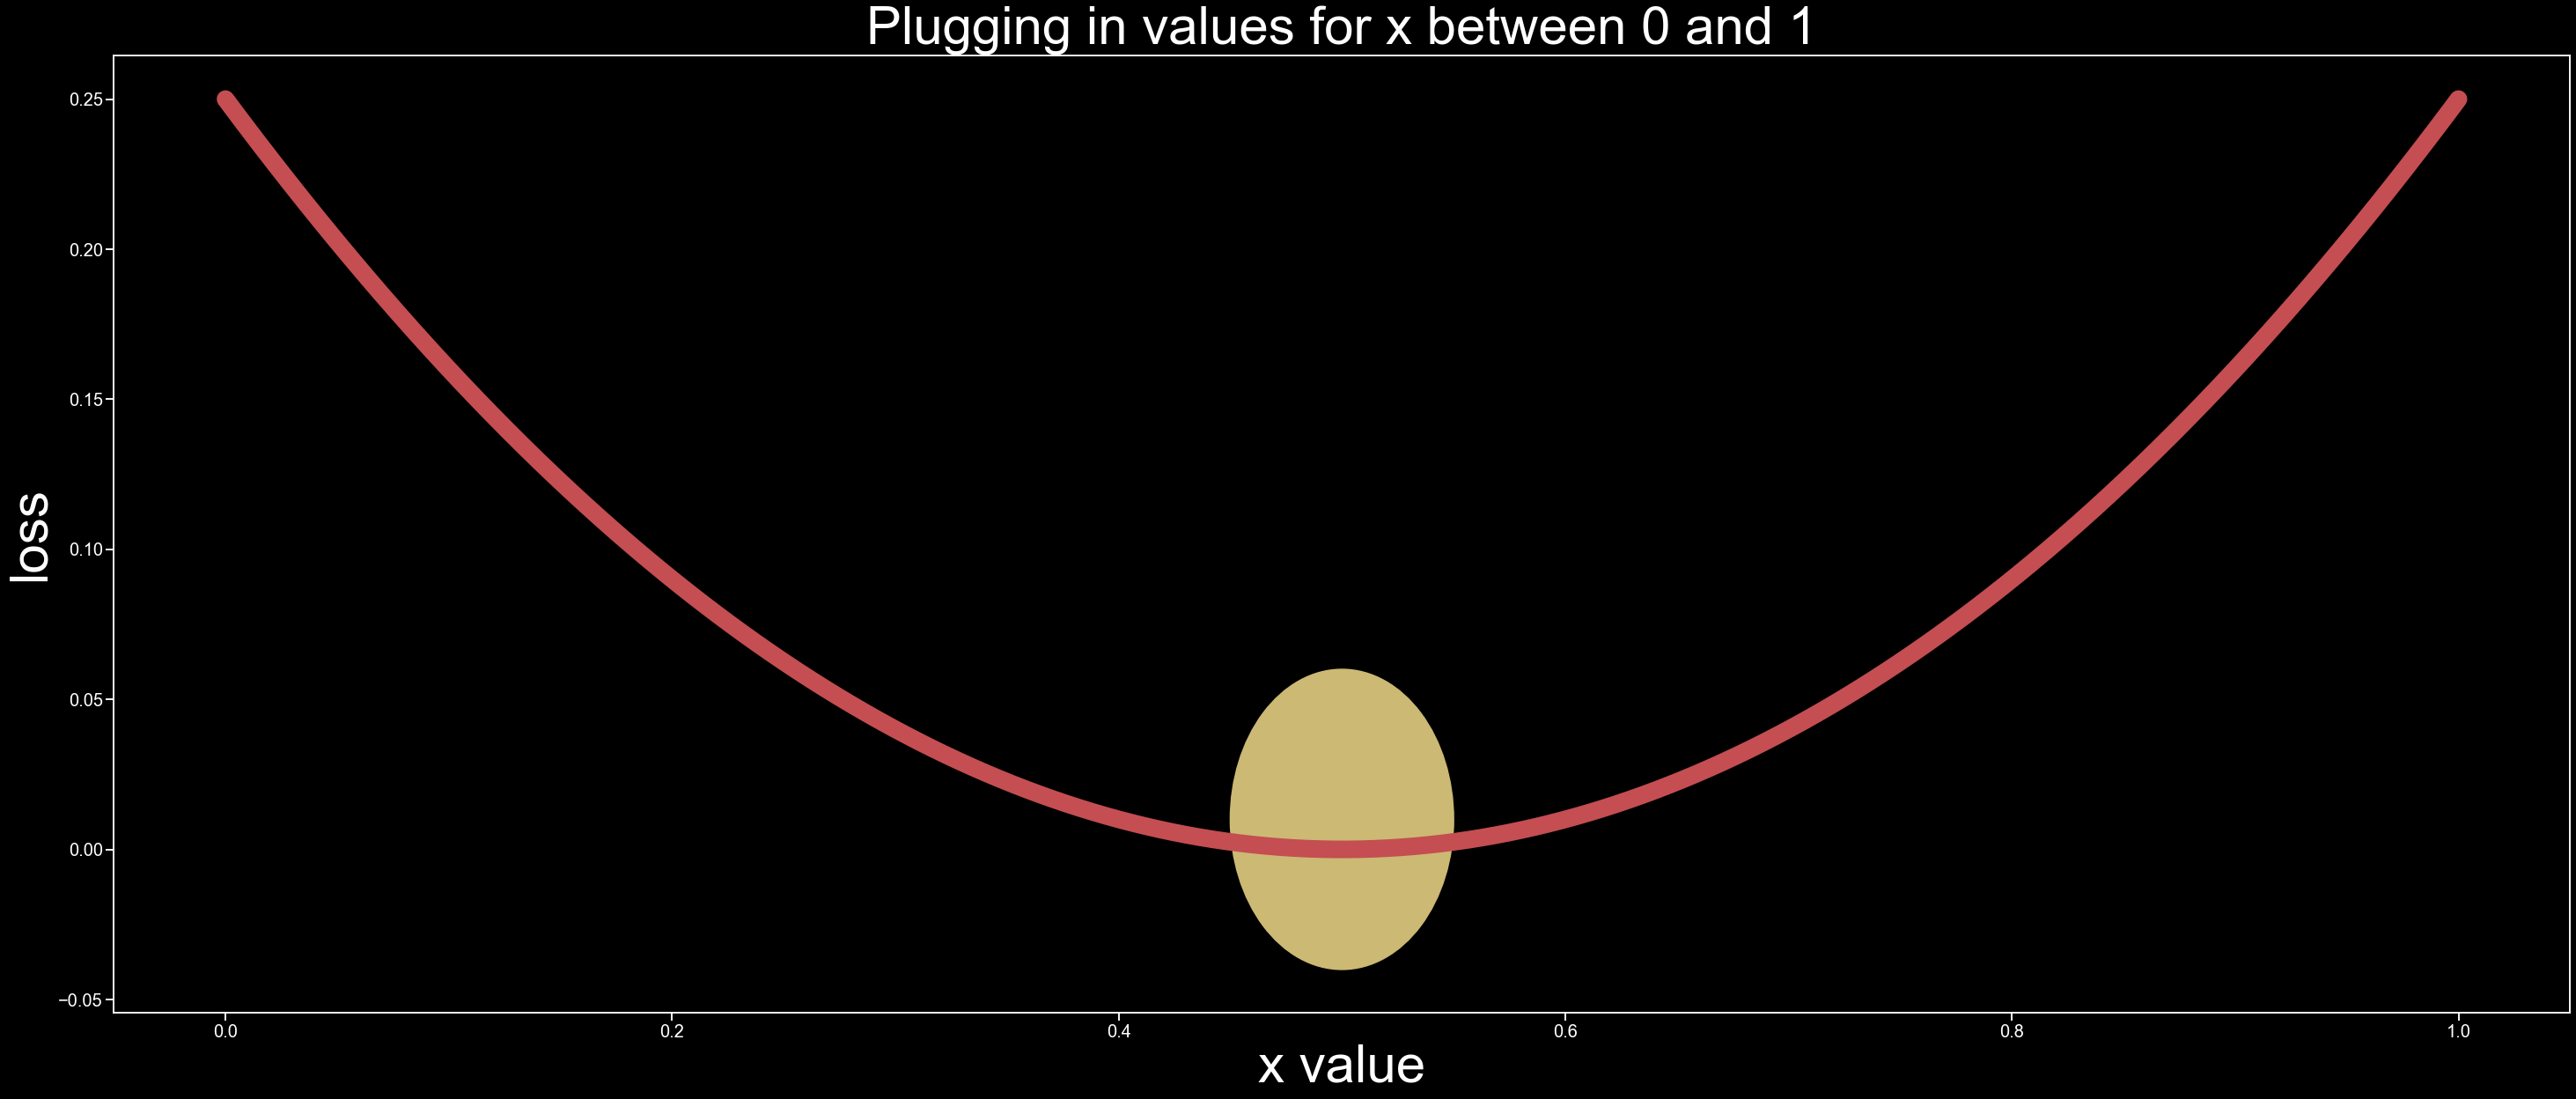

In [26]:
fig, (ax1) = plt.subplots(1,1, figsize=(50, 20))

ax1.set_title('Plugging in values for x between 0 and 1',fontsize=60)
ax1.set_xlabel('x value',fontsize=60)
ax1.set_ylabel('loss',fontsize=60)

circ = plt.Circle(((recommendation.value[0]), 0.01), 0.05, color='y')
    
min_loss = patches.Circle(1,1)
ax1.add_patch(circ)    

ax1 = plt.plot(grid_search,loss_list, lw=20, color='r')

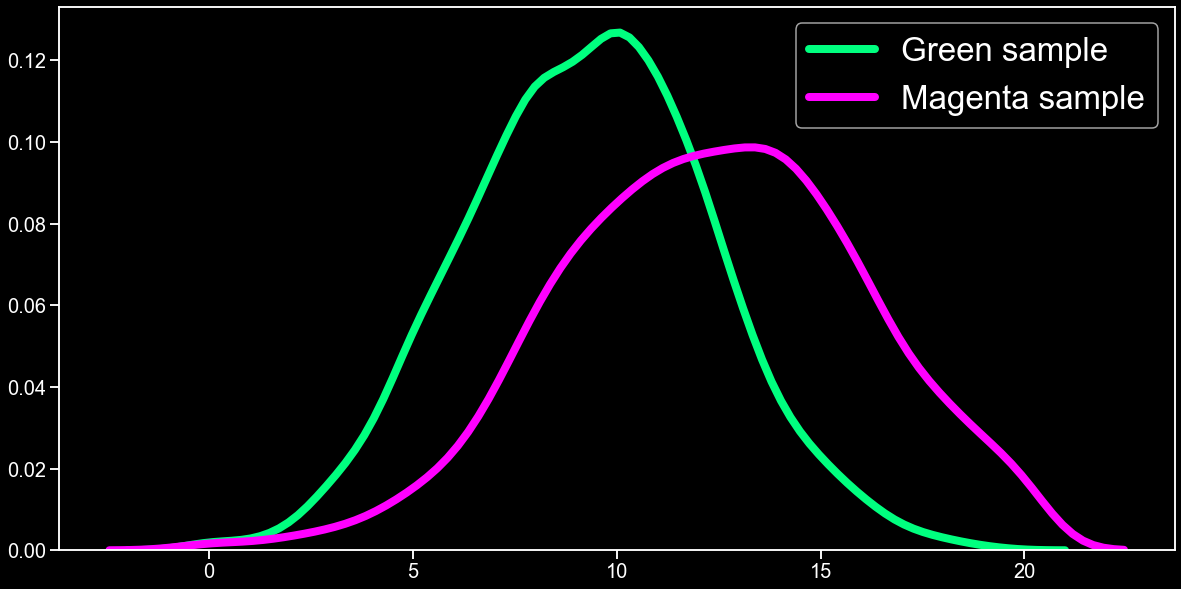

In [27]:
# Recall the two distributions from before

ax = plt.subplots(figsize=(20, 10))
ax = sns.kdeplot(first_normal_random_list, 
            color='SpringGreen', 
            shade=False, 
            label='Green sample',
            linewidth=8)
ax = sns.kdeplot(second_normal_random_list, 
            color='magenta', 
            shade=False, 
            label='Magenta sample',
            linewidth=8)

In [28]:
# Create a loss function which generates the magenta distribution

second_distribution_number_samples = 200 # Decrease to save time
parameters = [second_distribution_mean, second_distribution_std]

def generate_second_distribution(parameters):

    # Generate second distribution
    second_normal_random_list = []
    while len(second_normal_random_list) < second_distribution_number_samples:
        
        random_number = int(np.random.normal(loc=parameters[0], scale=abs(parameters[1])))
        
        if demo_min <= random_number <= demo_max:
            second_normal_random_list.append(random_number)
            
    # Check the loss using the KS function
    computed_ks = stats.ks_2samp(first_normal_random_list, second_normal_random_list)

    # Return the loss
    return computed_ks[0]
    

In [29]:
generate_second_distribution(parameters)

0.3955

In [ ]:
# Optimization on x as an array of shape (2,)
parametrization = ng.p.Array(init=[second_distribution_mean,
                                  second_distribution_std])


optimizer = ng.optimizers.OnePlusOne(parametrization=parametrization, # What's the starting point
                                     budget=400)                       # How much time to spend on optimisation


recommendation = optimizer.minimize(generate_second_distribution)     # Best value
print(recommendation.value)

In [42]:
parameters = [recommendation.value[0],
              recommendation.value[1]]

In [43]:
# Generate second distribution
second_normal_random_list = []
while len(second_normal_random_list) < second_distribution_number_samples:
    
    random_number = int(np.random.normal(loc=parameters[0], 
                                     scale=parameters[1]))
    
    if demo_min <= random_number <= demo_max:
        second_normal_random_list.append(random_number)


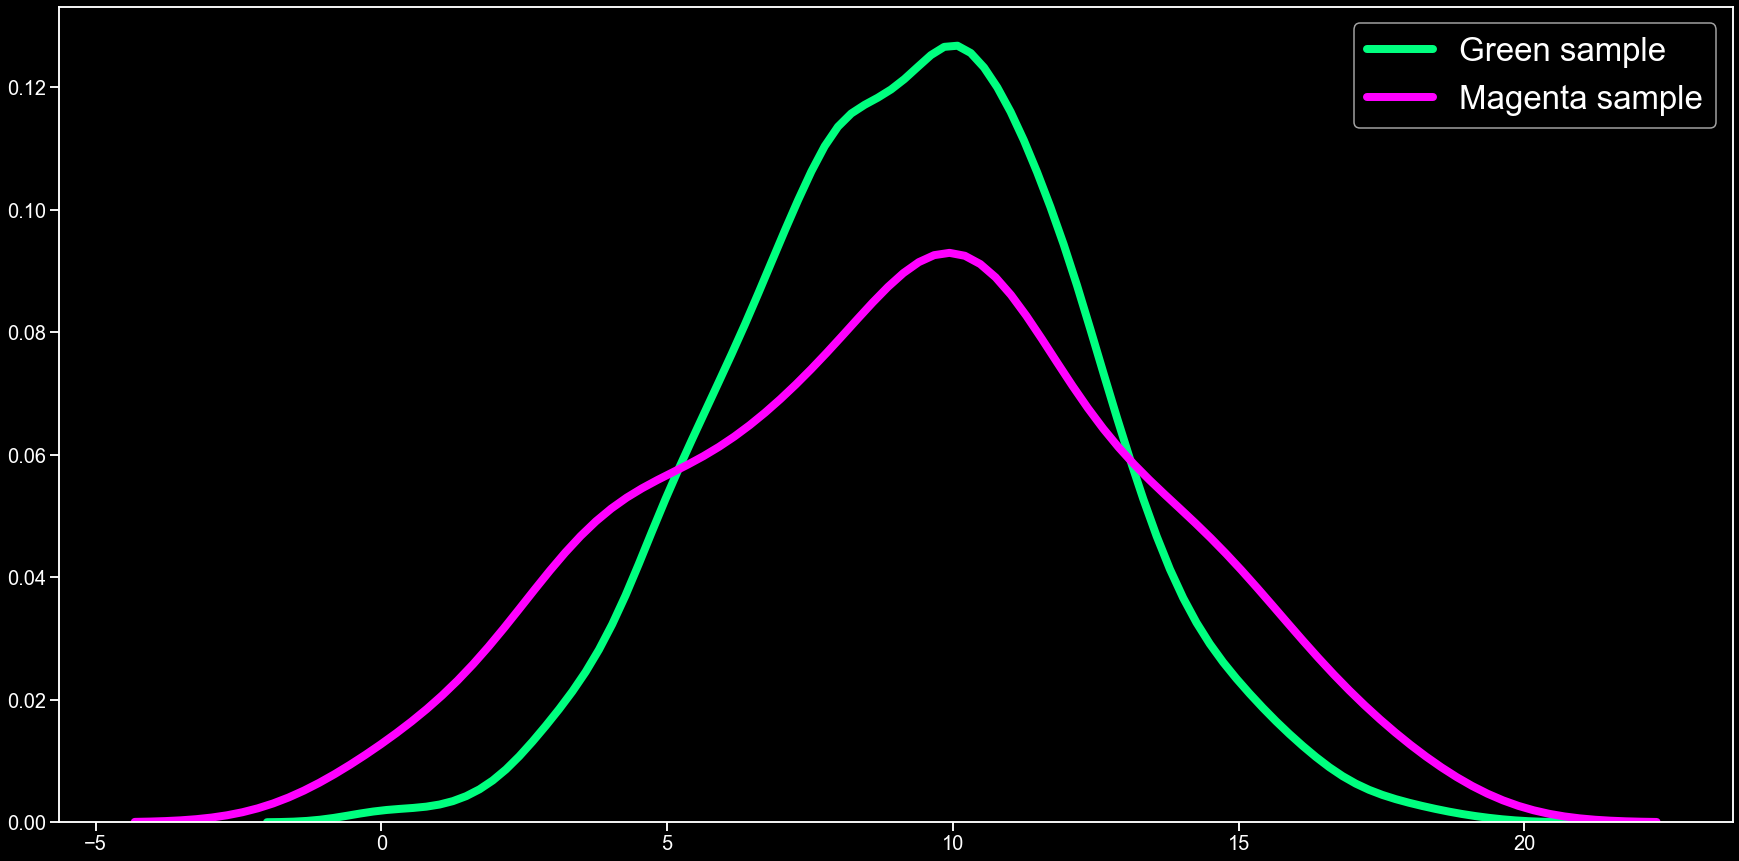

In [44]:
ax = plt.subplots(figsize=(30, 15))
ax = sns.kdeplot(first_normal_random_list, 
            color='SpringGreen', 
            shade=False, 
            label='Green sample',
            linewidth=8)
ax = sns.kdeplot(second_normal_random_list, 
            color='magenta', 
            shade=False, 
            label='Magenta sample',
            linewidth=8)